#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.covariance import EmpiricalCovariance


#Load Dataset

In [2]:
df = pd.read_csv('wine.data')
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
cols = ["Sort","Alcohol","Malic_acid","Ash","Alcalinity_of_ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid_phenols","Proanthocyanins","Color_intensity","Hue","o\OD280/OD315_of_diluted_wines","Proline"]
df = pd.read_csv('wine.data', names = cols)
df

,Sort,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,o\OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Sort                            178 non-null    int64  
 1   Alcohol                         178 non-null    float64
 2   Malic_acid                      178 non-null    float64
 3   Ash                             178 non-null    float64
 4   Alcalinity_of_ash               178 non-null    float64
 5   Magnesium                       178 non-null    int64  
 6   Total phenols                   178 non-null    float64
 7   Flavanoids                      178 non-null    float64
 8   Nonflavanoid_phenols            178 non-null    float64
 9   Proanthocyanins                 178 non-null    float64
 10  Color_intensity                 178 non-null    float64
 11  Hue                             178 non-null    float64
 12  o\OD280/OD315_of_diluted_wines  178 

In [6]:
df.describe()

,Sort,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,o\OD280/OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.shape

(178, 14)

In [8]:
df.isna().sum()

Sort                              0
Alcohol                           0
Malic_acid                        0
Ash                               0
Alcalinity_of_ash                 0
Magnesium                         0
Total phenols                     0
Flavanoids                        0
Nonflavanoid_phenols              0
Proanthocyanins                   0
Color_intensity                   0
Hue                               0
o\OD280/OD315_of_diluted_wines    0
Proline                           0
dtype: int64

# Test Train Split

In [9]:
X = df
y = X.pop("Sort")

In [10]:
X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,o\OD280/OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
X.shape

(178, 13)

In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Sort, dtype: int64

In [13]:
y.unique()

array([1, 2, 3])

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=20)

In [15]:
X_train.shape

(142, 13)

In [16]:
X_test.shape

(36, 13)

In [17]:
y_train.shape

(142,)

In [18]:
y_test.shape

(36,)

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#K-NN & Accuracy Calculation
Since the class is odd-valued, namely 3, then using k = 2, 4, and 6.

##For k = 2

In [20]:
cov = EmpiricalCovariance().fit(X_train)
k_values = [2]
scores = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'V': cov.covariance_})
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)

In [21]:
scores

{2: 0.8333333333333334}

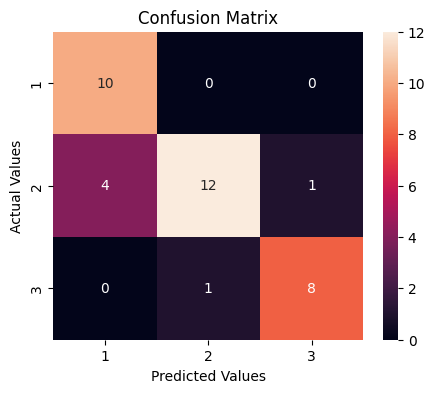

In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3'],
                     columns = ['1','2','3'])
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [23]:
#ketepatan hasil prediksi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        10
           2       0.92      0.71      0.80        17
           3       0.89      0.89      0.89         9

    accuracy                           0.83        36
   macro avg       0.84      0.86      0.84        36
weighted avg       0.86      0.83      0.83        36



##For k = 4

In [24]:
cov = EmpiricalCovariance().fit(X_train)
k_values = [4]
scores = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'V': cov.covariance_})
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)

In [25]:
scores

{4: 0.9722222222222222}

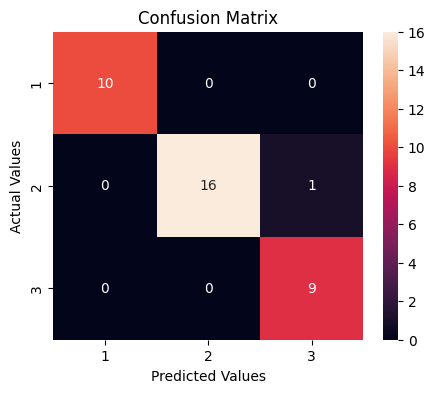

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3'],
                     columns = ['1','2','3'])
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [27]:
#ketepatan hasil prediksi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.94      0.97        17
           3       0.90      1.00      0.95         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



##For k = 6

In [28]:
cov = EmpiricalCovariance().fit(X_train)
k_values = [6]
scores = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'V': cov.covariance_})
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)

In [29]:
scores

{6: 0.9444444444444444}

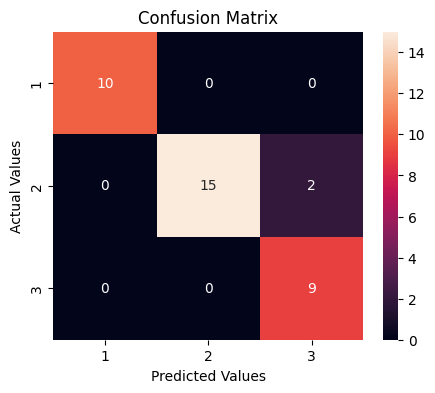

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3'],
                     columns = ['1','2','3'])
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [31]:
#ketepatan hasil prediksi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.88      0.94        17
           3       0.82      1.00      0.90         9

    accuracy                           0.94        36
   macro avg       0.94      0.96      0.95        36
weighted avg       0.95      0.94      0.95        36



In [32]:
#Inserting Training Data into the Classification Function for K-NN
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='mahalanobis',
                     metric_params={'V': array([[ 1.        ,  0.08473713,  0.23850382, -0.31063366,  0.26203992,
         0.30029582,  0.26423456, -0.17681694,  0.14488744,  0.53195583,
        -0.08565608,  0.11960267,  0.65133663],
       [ 0.08473713,  1.        ,  0.13652518,  0.28517624, -0.07209718,
        -0.36246481, -0.4114036 ,  0.2985249 , -0.24568734,  0.21404075,
        -0.55159583, -0.37239977, -0.22075776],...
         0.4752751 ,  0.56415889, -0.29476814,  0.33855337, -0.53746615,
         1.        ,  0.57480527,  0.22871856],
       [ 0.11960267, -0.37239977,  0.05266569, -0.24171944,  0.09049105,
         0.69696164,  0.77318298, -0.48763605,  0.50306512, -0.43386809,
         0.57480527,  1.        ,  0.31661184],
       [ 0.65133663, -0.22075776,  0.23826277, -0.40311767,  0.3876562 ,
         0.50003998,  0.49302409, -0.32133748,  0.31320114,  0.30178516,
         0.22871856,  0.31661184,  1.        ]])},
                     n_neighbors=6)

In [33]:
#Finding predictions
y_pred = knn.predict (X_test)
y_pred

array([2, 3, 1, 2, 2, 2, 3, 2, 2, 3, 1, 3, 2, 2, 1, 2, 2, 1, 1, 3, 3, 1,
       2, 1, 3, 3, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1])

In [34]:
#Finding Prediction Probabilities
knn.predict_proba(X_test)

array([[0.16666667, 0.83333333, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.66666667, 0.16666667, 0.16666667],
       [0.16666667, 0.66666667, 0.16666667],
       [0.        , 1.        , 0.        ],
       [0.16666667, 0.66666667, 0.16666667],
       [0.16666667, 0.        , 0.83333333],
       [0.        , 1.        , 0.        ],
       [0.16666667, 0.83333333, 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.16666667, 0.83333333],
       [0.16666667, 0.66666667, 0.16666667],
       [0.16666667, 0.66666667, 0.16666667],
       [0.66666667, 0.33333333, 0.        ],
       [0.16666667, 0.83333333, 0.        ],
       [0.16666667, 0.83333333, 0.        ],
       [0.83333333, 0.16666667, 0.        ],
       [0.83333333, 0.16666667, 0.        ],
       [0.        , 0.16666667, 0.83333333],
       [0.        , 0.        , 1.        ],
       [0.83333333, 0.16666667, 0.        ],
       [0.

In [35]:
#Displaying the Predicted Results Matrix
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0 15  2]
 [ 0  0  9]]
